In [145]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from matplotlib import pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from IPython.core.interactiveshell import InteractiveShell
from statsmodels.stats.outliers_influence import variance_inflation_factor

import os
import warnings
import pandas as pd
import seaborn as sns

In [146]:
warnings.filterwarnings(action='ignore')
InteractiveShell.ast_node_interactivity = "all"

In [147]:
input_dir = '../Database/'
file_train = 'train.csv'
file_test = 'test.csv'
train = pd.read_csv(os.path.join(input_dir, file_train))
test = pd.read_csv(os.path.join(input_dir, file_test))

In [148]:
label_encoder = LabelEncoder()
encoder_data = label_encoder.fit_transform(list(train['대출기간']))
train['대출기간'] = pd.DataFrame(encoder_data)

encoder_data = label_encoder.transform(list(test['대출기간']))
test['대출기간'] = pd.DataFrame(encoder_data)

In [149]:
label_encoder = LabelEncoder()
encoder_data = label_encoder.fit_transform(list(train['근로기간']))
train['근로기간'] = pd.DataFrame(encoder_data)

encoder_data = label_encoder.transform(list(test['근로기간']))
test['근로기간'] = pd.DataFrame(encoder_data)

In [150]:
label_encoder = LabelEncoder()
encoder_data = label_encoder.fit_transform(list(train['주택소유상태']))
train['주택소유상태'] = pd.DataFrame(encoder_data)

encoder_data = label_encoder.transform(list(test['주택소유상태']))
test['주택소유상태'] = pd.DataFrame(encoder_data)

In [151]:
# train_dataset에는 없는 결혼 범주가 test_dataset에 1개 있음. 그것 제외.
test.drop(34486, inplace=True)

In [152]:
label_encoder = LabelEncoder()
encoder_data = label_encoder.fit_transform(list(train['대출목적']))
train['대출목적'] = pd.DataFrame(encoder_data)

encoder_data = label_encoder.transform(list(test['대출목적']))
test['대출목적'] = pd.DataFrame(encoder_data)

In [153]:
label_encoder = LabelEncoder()
encoder_data = label_encoder.fit_transform(list(train['대출등급']))
train['대출등급'] = pd.DataFrame(encoder_data)

In [154]:
train.set_index(train['ID'], inplace=True)
train.pop('ID')

test.set_index(test['ID'], inplace=True)
test.pop('ID')

ID
TRAIN_00000    TRAIN_00000
TRAIN_00001    TRAIN_00001
TRAIN_00002    TRAIN_00002
TRAIN_00003    TRAIN_00003
TRAIN_00004    TRAIN_00004
                  ...     
TRAIN_96289    TRAIN_96289
TRAIN_96290    TRAIN_96290
TRAIN_96291    TRAIN_96291
TRAIN_96292    TRAIN_96292
TRAIN_96293    TRAIN_96293
Name: ID, Length: 96294, dtype: object

ID
TEST_00000    TEST_00000
TEST_00001    TEST_00001
TEST_00002    TEST_00002
TEST_00003    TEST_00003
TEST_00004    TEST_00004
                 ...    
TEST_64192    TEST_64192
TEST_64193    TEST_64193
TEST_64194    TEST_64194
TEST_64195    TEST_64195
TEST_64196    TEST_64196
Name: ID, Length: 64196, dtype: object

In [155]:
from sklearn.decomposition import PCA

def do_pca(X_pca):
    columns_pca = [f'PCA_{i}' for i in range(1, X_pca.shape[1] + 1)]
    X_pca_df = pd.DataFrame(X_pca, columns=columns_pca)
    return X_pca_df

In [156]:
scaler = StandardScaler()
pca = PCA(n_components=0.99)

gt = pd.DataFrame(train['대출등급'], columns=['대출등급'])
to_normalize_list = ['대출금액', '연간소득', '부채_대비_소득_비율', '총계좌수', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수']
X = pd.DataFrame(train[to_normalize_list], columns=to_normalize_list, index=train.index)
Y = pd.DataFrame(test[to_normalize_list], columns=to_normalize_list, index=test.index)

data_scaled = scaler.fit_transform(X)
X_pca = pca.fit_transform(data_scaled)
data_scaled = do_pca(X_pca)
data_scaled.index = train.index

train.drop(columns=to_normalize_list, inplace=True)
train.drop(columns='대출등급', inplace=True)
train = pd.concat([gt, data_scaled, train], axis=1)

data_scaled = scaler.transform(Y)
X_pca = pca.transform(data_scaled)
data_scaled = do_pca(X_pca)
data_scaled.index = test.index

test.drop(columns=to_normalize_list, inplace=True)
test = pd.concat([data_scaled, test], axis=1)
print(pca.explained_variance_ratio_)

[0.23435696 0.13204401 0.11452362 0.11334532 0.10807743 0.09581843
 0.08924333 0.0733093  0.0392816 ]


In [157]:
test.dropna(inplace=True)
plt.rc('font', family='GULIM')

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Pearson Correlation Heatmap')

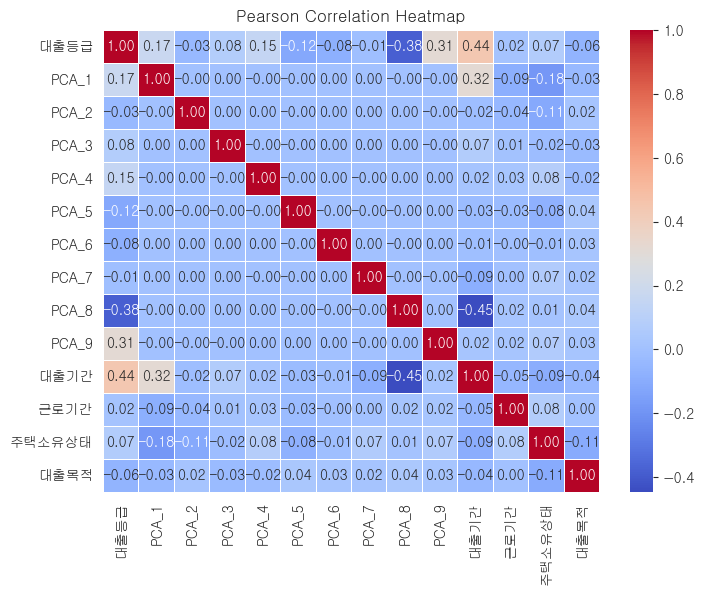

In [158]:
correlation_matrix = train.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Pearson Correlation Heatmap')
plt.show()

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Spearman Correlation Heatmap')

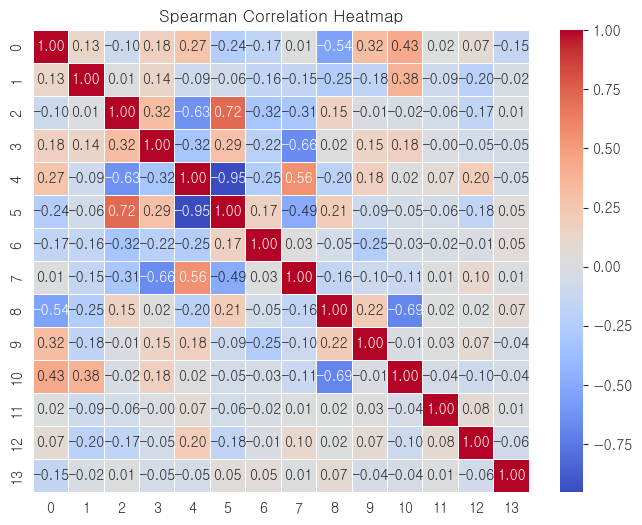

In [159]:
correlation_matrix, _ = spearmanr(train)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Spearman Correlation Heatmap')
plt.show()

In [46]:
category_list = ['대출기간', '근로기간', '주택소유상태', '대출목적']

for i in range(len(category_list)):
    contingency_table = pd.crosstab(train['대출등급'], train[category_list[i]])
    chi, p, dof, expected = chi2_contingency(contingency_table)
    print(f'{category_list[i]} chi: {chi}, p_value: {p}')

대출기간 chi: 19134.184195744863, p_value: 0.0
근로기간 chi: 187.56633181905977, p_value: 7.714129711631081e-09
주택소유상태 chi: 663.4327372511038, p_value: 3.225488826409481e-129
대출목적 chi: 5744.213056799291, p_value: 0.0


In [47]:
X = train[to_normalize_list]
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

       Variable       VIF
0          대출금액  1.816086
1          연간소득  1.103885
2   부채_대비_소득_비율  1.007299
3          총계좌수  1.075159
4  최근_2년간_연체_횟수  1.034358
5         총상환원금  1.247752
6         총상환이자  1.735677
7         총연체금액  1.004337
8         연체계좌수  1.018452


In [48]:
corr_A_B = pearsonr(train['대출등급'], train['총상환이자'])[0]
corr_A_C = pearsonr(train['대출등급'], train['총상환원금'])[0]
corr_B_C = pearsonr(train['총상환이자'], train['총상환원금'])[0]
partial_corr= (corr_A_C - (corr_B_C * corr_A_B)) / ((1 - corr_B_C**2)*(1 - corr_A_B**2))**0.5

print(partial_corr)

-0.34883840820047785


In [160]:
# train_list=['대출등급', '대출금액', '부채_대비_소득_비율', '최근_2년간_연체_횟수', '총상환이자', '대출기간', '근로기간', '주택소유상태', '대출목적']
# test_list=['대출금액', '부채_대비_소득_비율', '최근_2년간_연체_횟수', '총상환이자', '대출기간', '근로기간', '주택소유상태', '대출목적']
# train=train[train_list]
# test=test[test_list]

train.drop(columns='PCA_8', inplace=True)
test.drop(columns='PCA_8', inplace=True)

In [162]:
train

,대출등급,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_9,대출기간,근로기간,주택소유상태,대출목적
ID,,,,,,,,,,,,,
TRAIN_00000,2,-1.518184,-0.396385,-0.147856,-0.007300,0.000364,0.380378,0.260632,-0.298518,0,9,3,1
TRAIN_00001,1,-0.656344,-0.212596,-0.060874,-0.240240,0.223453,0.535634,0.258699,0.051793,1,2,1,10
TRAIN_00002,0,-0.892414,-0.598199,-0.542445,0.084168,-0.147321,0.286908,0.411122,-0.051210,0,8,1,1
TRAIN_00003,2,-0.898429,-0.403546,-0.396646,-0.139772,0.119074,0.588045,0.520835,-0.108407,0,11,1,1
TRAIN_00004,1,-0.837413,-0.356329,0.123310,-0.021830,-0.037809,0.322570,0.101469,-0.436706,1,15,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRAIN_96289,2,0.407760,0.140697,-0.349540,-0.685204,0.712737,0.578872,-0.098090,0.644365,0,2,1,3
TRAIN_96290,4,1.108317,-0.424498,-0.377943,-0.101806,0.032000,0.208711,-0.157618,0.039505,1,2,1,10
TRAIN_96291,0,-0.267635,-0.466737,-0.286992,0.022775,-0.130973,0.066388,-0.011632,-0.076340,0,0,1,3


In [163]:
train.to_csv('../Database/train_modified4.csv')
test.to_csv('../Database/test_modified4.csv')

<Axes: >

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(1, 0, '대출등급'),
  Text(2, 0, '대출금액'),
  Text(3, 0, '연간소득'),
  Text(4, 0, '부채_대비_소득_비율'),
  Text(5, 0, '총계좌수'),
  Text(6, 0, '최근_2년간_연체_횟수'),
  Text(7, 0, '총상환원금'),
  Text(8, 0, '총상환이자'),
  Text(9, 0, '총연체금액'),
  Text(10, 0, '연체계좌수'),
  Text(11, 0, '대출기간'),
  Text(12, 0, '근로기간'),
  Text(13, 0, '주택소유상태'),
  Text(14, 0, '대출목적')])

Text(0.5, 0.98, 'Train Data')

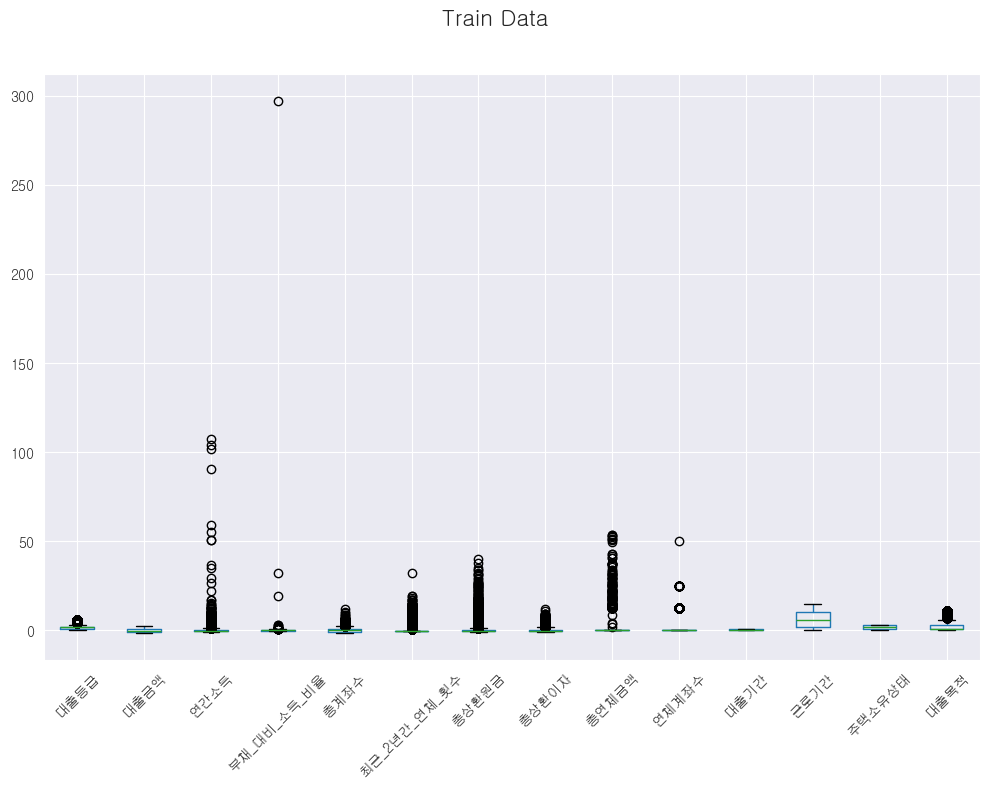

In [302]:
fig, ax = plt.subplots(figsize=(10, 8))
train.boxplot(ax=ax)
plt.xticks(rotation=45)
fig.suptitle('Train Data', fontsize=16)
fig.tight_layout(rect=[0, 0, 1, 0.96])
fig.show()

In [303]:
col = '총상환원금'

Q1 = train[col].quantile(0.99)
Q3 = train[col].quantile(0.01)
outliers_index = train[(train[col] > Q1) | (train[col] < Q3)].index
len(outliers_index)
len(train)

963

96294

<Axes: >

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(1, 0, '대출등급'),
  Text(2, 0, '대출금액'),
  Text(3, 0, '연간소득'),
  Text(4, 0, '부채_대비_소득_비율'),
  Text(5, 0, '총계좌수'),
  Text(6, 0, '최근_2년간_연체_횟수'),
  Text(7, 0, '총상환원금'),
  Text(8, 0, '총상환이자'),
  Text(9, 0, '총연체금액'),
  Text(10, 0, '연체계좌수'),
  Text(11, 0, '대출기간'),
  Text(12, 0, '근로기간'),
  Text(13, 0, '주택소유상태'),
  Text(14, 0, '대출목적')])

Text(0.5, 0.98, 'Train Data')

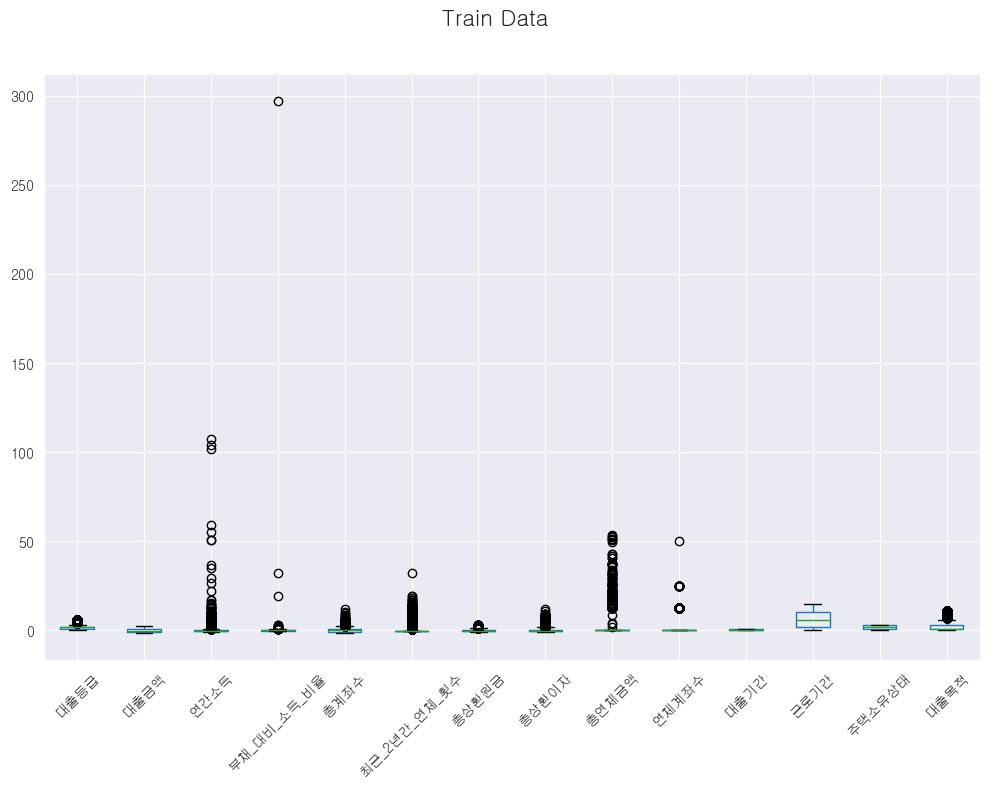

In [16]:
train.drop(outliers_index, inplace=True)
fig, ax = plt.subplots(figsize=(10, 8))
train.boxplot(ax=ax)
plt.xticks(rotation=45)
fig.suptitle('Train Data', fontsize=16)
fig.tight_layout(rect=[0, 0, 1, 0.96])
fig.show()

In [17]:
col = '연간소득'

Q1 = train[col].quantile(0.99)
Q3 = train[col].quantile(0.01)
outliers_index = train[(train[col] > Q1) | (train[col] < Q3)].index
len(outliers_index)
len(train)

1906

95331

<Axes: >

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(1, 0, '대출등급'),
  Text(2, 0, '대출금액'),
  Text(3, 0, '연간소득'),
  Text(4, 0, '부채_대비_소득_비율'),
  Text(5, 0, '총계좌수'),
  Text(6, 0, '최근_2년간_연체_횟수'),
  Text(7, 0, '총상환원금'),
  Text(8, 0, '총상환이자'),
  Text(9, 0, '총연체금액'),
  Text(10, 0, '연체계좌수'),
  Text(11, 0, '대출기간'),
  Text(12, 0, '근로기간'),
  Text(13, 0, '주택소유상태'),
  Text(14, 0, '대출목적')])

Text(0.5, 0.98, 'Train Data')

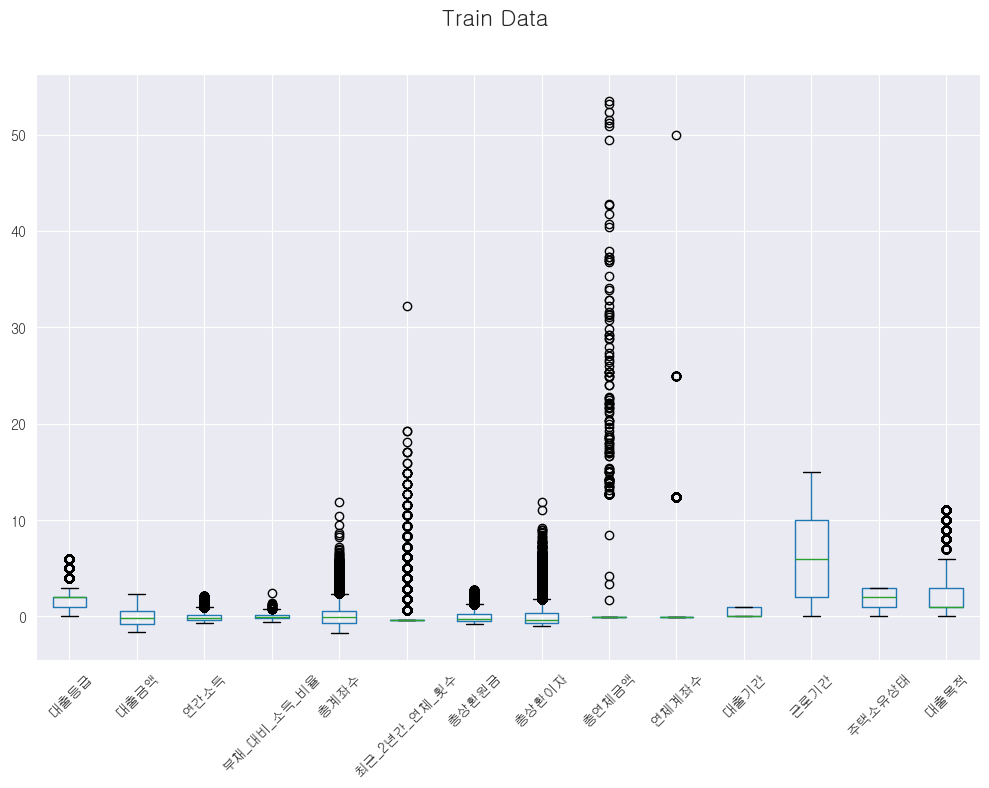

In [19]:
train.drop(outliers_index, inplace=True)
fig, ax = plt.subplots(figsize=(10, 8))
train.boxplot(ax=ax)
plt.xticks(rotation=45)
fig.suptitle('Train Data', fontsize=16)
fig.tight_layout(rect=[0, 0, 1, 0.96])
fig.show()

In [248]:
col = '총연체금액'

Q1 = train[col].quantile(0.99)
Q3 = train[col].quantile(0.01)
outliers_index = train[(train[col] > Q1) | (train[col] < Q3)].index
len(outliers_index)
len(train)

181

96294

<Axes: >

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(1, 0, '대출등급'),
  Text(2, 0, '대출금액'),
  Text(3, 0, '연간소득'),
  Text(4, 0, '부채_대비_소득_비율'),
  Text(5, 0, '총계좌수'),
  Text(6, 0, '최근_2년간_연체_횟수'),
  Text(7, 0, '총상환원금'),
  Text(8, 0, '총상환이자'),
  Text(9, 0, '총연체금액'),
  Text(10, 0, '연체계좌수'),
  Text(11, 0, '대출기간'),
  Text(12, 0, '근로기간'),
  Text(13, 0, '주택소유상태'),
  Text(14, 0, '대출목적')])

Text(0.5, 0.98, 'Train Data')

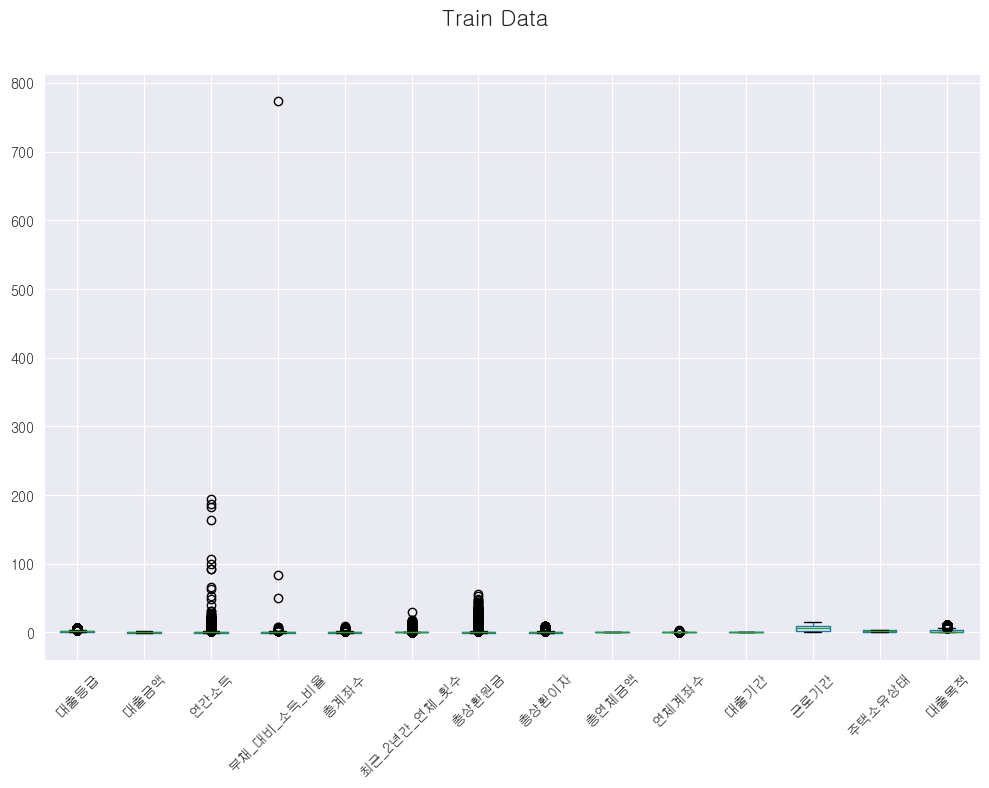

In [251]:
train.drop(outliers_index, inplace=True)
fig, ax = plt.subplots(figsize=(10, 8))
train.boxplot(ax=ax)
plt.xticks(rotation=45)
fig.suptitle('Train Data', fontsize=16)
fig.tight_layout(rect=[0, 0, 1, 0.96])
fig.show()

In [22]:
col = '연체계좌수'

Q1 = train[col].quantile(0.99)
Q3 = train[col].quantile(0.01)
outliers_index = train[(train[col] > Q1) | (train[col] < Q3)].index
len(outliers_index)
len(train)

514

93250

<Axes: >

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(1, 0, '대출등급'),
  Text(2, 0, '대출금액'),
  Text(3, 0, '연간소득'),
  Text(4, 0, '부채_대비_소득_비율'),
  Text(5, 0, '총계좌수'),
  Text(6, 0, '최근_2년간_연체_횟수'),
  Text(7, 0, '총상환원금'),
  Text(8, 0, '총상환이자'),
  Text(9, 0, '총연체금액'),
  Text(10, 0, '연체계좌수'),
  Text(11, 0, '대출기간'),
  Text(12, 0, '근로기간'),
  Text(13, 0, '주택소유상태'),
  Text(14, 0, '대출목적')])

Text(0.5, 0.98, 'Train Data')

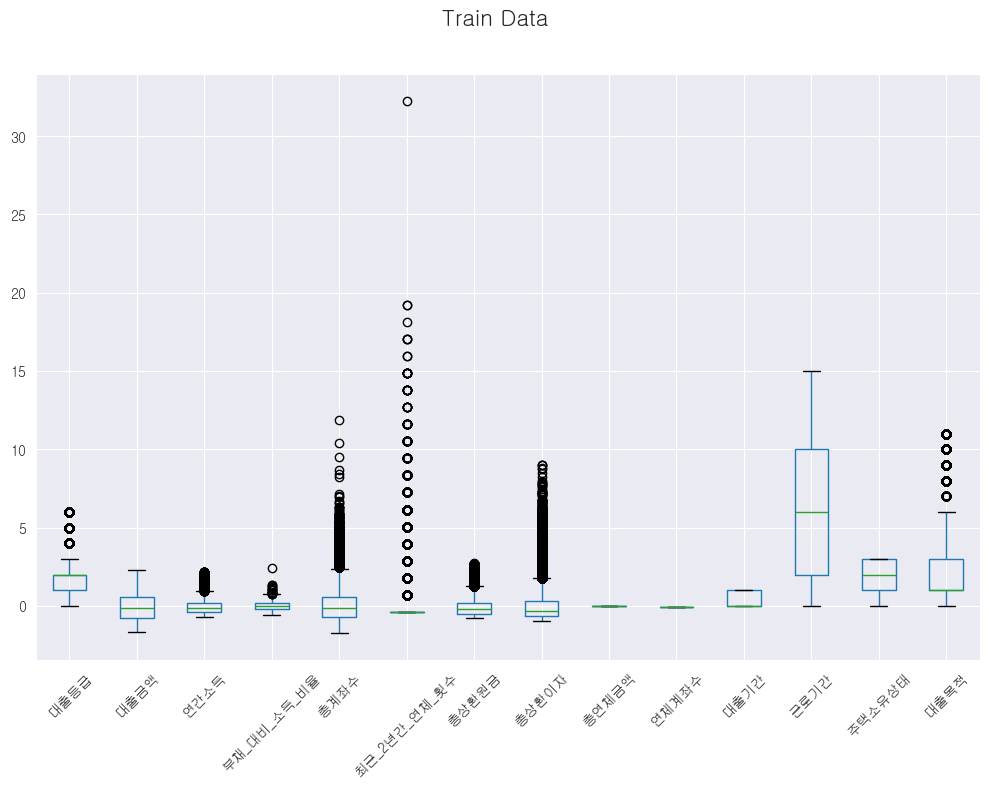

In [23]:
train.drop(outliers_index, inplace=True)
fig, ax = plt.subplots(figsize=(10, 8))
train.boxplot(ax=ax)
plt.xticks(rotation=45)
fig.suptitle('Train Data', fontsize=16)
fig.tight_layout(rect=[0, 0, 1, 0.96])
fig.show()

In [24]:
col = '최근_2년간_연체_횟수'

Q1 = train[col].quantile(0.99)
Q3 = train[col].quantile(0.01)
outliers_index = train[(train[col] > Q1) | (train[col] < Q3)].index
len(outliers_index)
len(train)

750

92736

<Axes: >

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(1, 0, '대출등급'),
  Text(2, 0, '대출금액'),
  Text(3, 0, '연간소득'),
  Text(4, 0, '부채_대비_소득_비율'),
  Text(5, 0, '총계좌수'),
  Text(6, 0, '최근_2년간_연체_횟수'),
  Text(7, 0, '총상환원금'),
  Text(8, 0, '총상환이자'),
  Text(9, 0, '총연체금액'),
  Text(10, 0, '연체계좌수'),
  Text(11, 0, '대출기간'),
  Text(12, 0, '근로기간'),
  Text(13, 0, '주택소유상태'),
  Text(14, 0, '대출목적')])

Text(0.5, 0.98, 'Train Data')

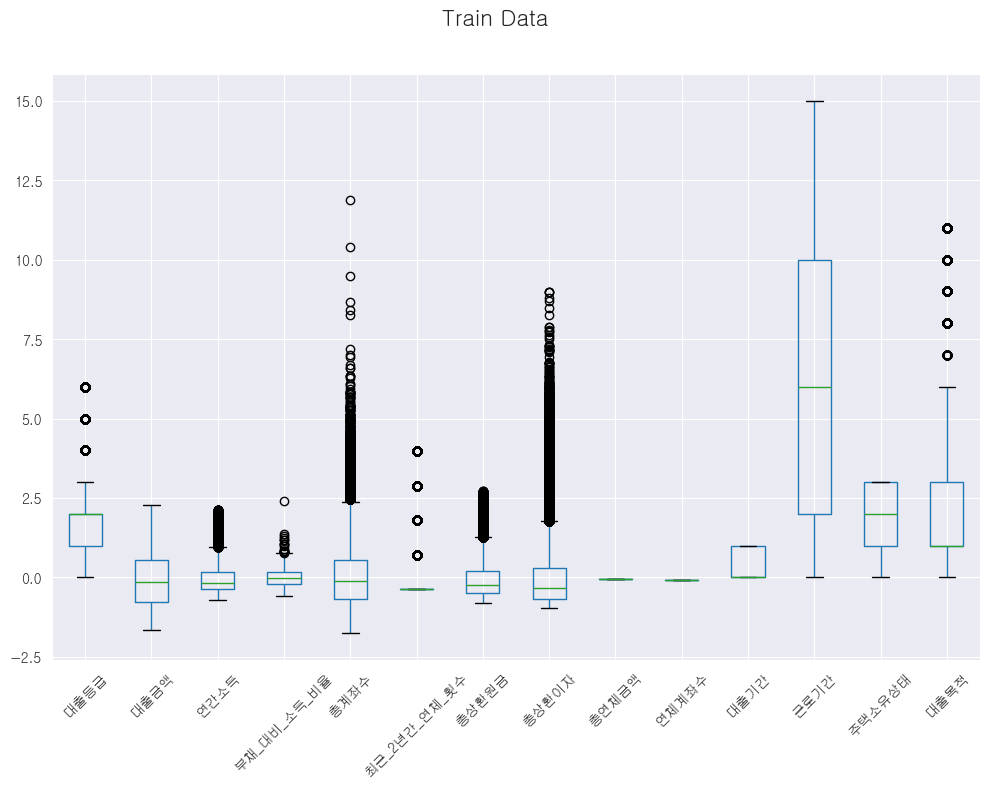

In [25]:
train.drop(outliers_index, inplace=True)
fig, ax = plt.subplots(figsize=(10, 8))
train.boxplot(ax=ax)
plt.xticks(rotation=45)
fig.suptitle('Train Data', fontsize=16)
fig.tight_layout(rect=[0, 0, 1, 0.96])
fig.show()

In [26]:
col = '총상환이자'

Q1 = train[col].quantile(0.99)
Q3 = train[col].quantile(0.01)
outliers_index = train[(train[col] > Q1) | (train[col] < Q3)].index
len(outliers_index)
len(train)

920

91986

<Axes: >

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(1, 0, '대출등급'),
  Text(2, 0, '대출금액'),
  Text(3, 0, '연간소득'),
  Text(4, 0, '부채_대비_소득_비율'),
  Text(5, 0, '총계좌수'),
  Text(6, 0, '최근_2년간_연체_횟수'),
  Text(7, 0, '총상환원금'),
  Text(8, 0, '총상환이자'),
  Text(9, 0, '총연체금액'),
  Text(10, 0, '연체계좌수'),
  Text(11, 0, '대출기간'),
  Text(12, 0, '근로기간'),
  Text(13, 0, '주택소유상태'),
  Text(14, 0, '대출목적')])

Text(0.5, 0.98, 'Train Data')

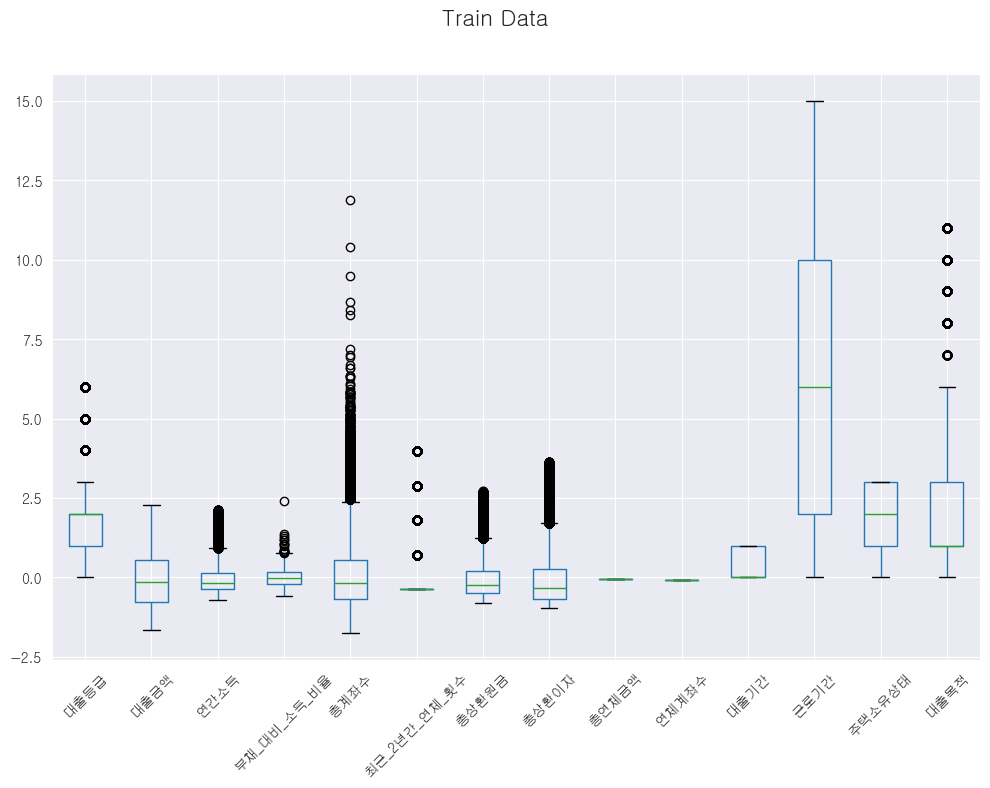

In [27]:
train.drop(outliers_index, inplace=True)
fig, ax = plt.subplots(figsize=(10, 8))
train.boxplot(ax=ax)
plt.xticks(rotation=45)
fig.suptitle('Train Data', fontsize=16)
fig.tight_layout(rect=[0, 0, 1, 0.96])
fig.show()

In [28]:
col = '총계좌수'

Q1 = train[col].quantile(0.99)
Q3 = train[col].quantile(0.01)
outliers_index = train[(train[col] > Q1) | (train[col] < Q3)].index
len(outliers_index)
len(train)

1658

91066

<Axes: >

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(1, 0, '대출등급'),
  Text(2, 0, '대출금액'),
  Text(3, 0, '연간소득'),
  Text(4, 0, '부채_대비_소득_비율'),
  Text(5, 0, '총계좌수'),
  Text(6, 0, '최근_2년간_연체_횟수'),
  Text(7, 0, '총상환원금'),
  Text(8, 0, '총상환이자'),
  Text(9, 0, '총연체금액'),
  Text(10, 0, '연체계좌수'),
  Text(11, 0, '대출기간'),
  Text(12, 0, '근로기간'),
  Text(13, 0, '주택소유상태'),
  Text(14, 0, '대출목적')])

Text(0.5, 0.98, 'Train Data')

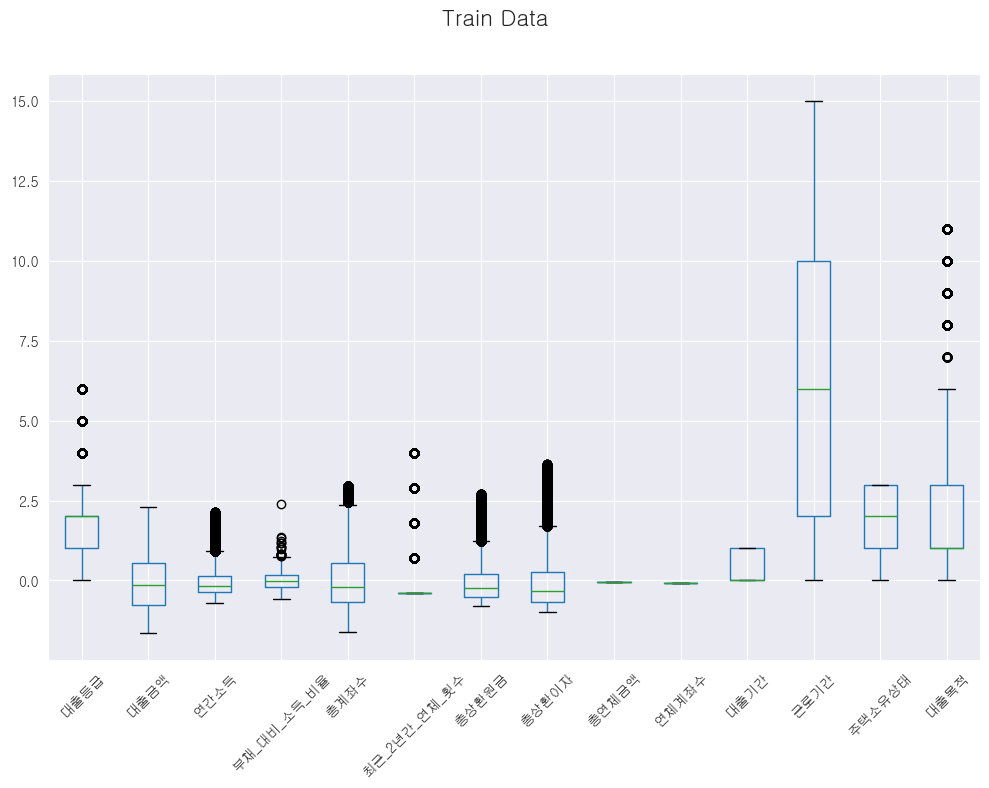

In [29]:
train.drop(outliers_index, inplace=True)
fig, ax = plt.subplots(figsize=(10, 8))
train.boxplot(ax=ax)
plt.xticks(rotation=45)
fig.suptitle('Train Data', fontsize=16)
fig.tight_layout(rect=[0, 0, 1, 0.96])
fig.show()